In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

HTTPError: HTTP Error 504: Gateway Time-out

In [ ]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [5]:
# Count unique values in the specified column
unique_count = df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [6]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [7]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [8]:
# Define the target cks values with quotes
target_cks = [
   'CK_Stationary and Retrograde Motion',
   'CK_Circles of Equant Deferent Epicycle',
    'CK_Lunar Nodes',
    'CK_Lunar Orbit'
]

# Filter the DataFrame for matching cks values
filtered_df = df_exploded[df_exploded['cks'].isin(target_cks)]
filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
67,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00664,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1488,nan
68,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01881,CK_Lunar Nodes,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1488,nan
93,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01876,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1485,nan
94,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01876,CK_Lunar Nodes,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1485,nan
100,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00303,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,1485,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
27958,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00690,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/b38...,2237,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1585,nan
27972,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00820,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1581,nan
27973,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00820,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1581,nan
27974,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00690,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1581,nan


In [9]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 961


In [10]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Circles of Equant Deferent Epicycle    736
CK_Lunar Nodes                            308
CK_Lunar Orbit                            178
CK_Stationary and Retrograde Motion       131
Name: images, dtype: int64


In [11]:
# Count the unique values in the 'cluster_name' column
unique_cluster_names_count = filtered_df['cluster_name'].nunique()

# Print the result
print("Number of unique cluster names:", unique_cluster_names_count)

Number of unique cluster names: 131


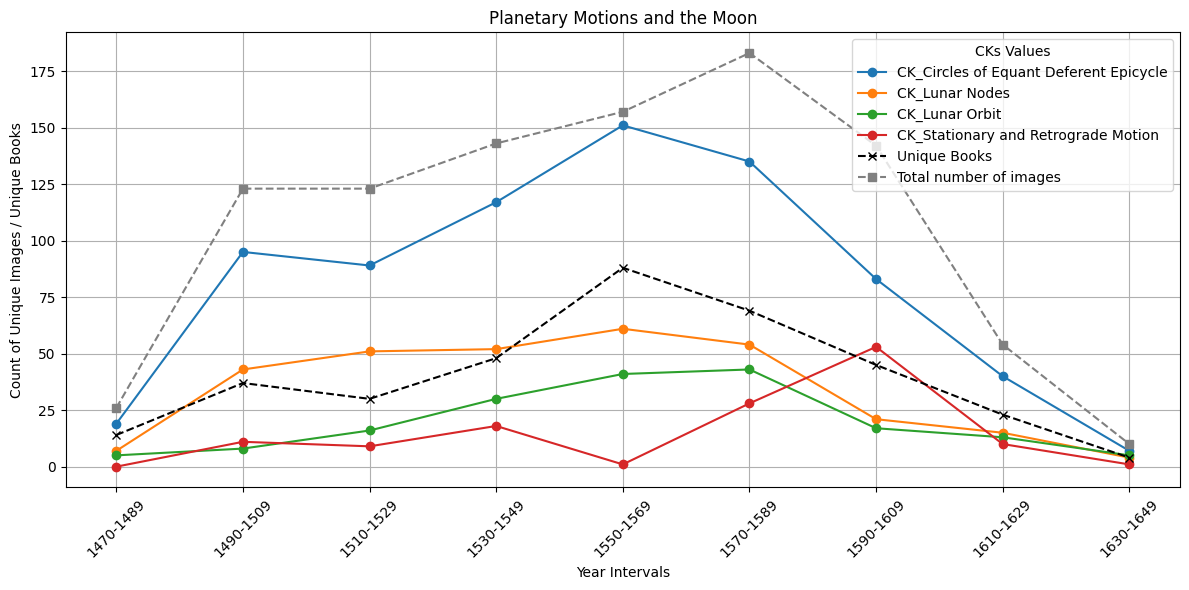

In [41]:
# Ensure the year columns are of integer type
filtered_df = filtered_df.copy()  # Ensure filtered_df is a copy and not a slice
books = books.copy()  # Ensure books is a copy and not a slice

# Convert the 'year' columns to integer type
filtered_df['year'] = filtered_df['year'].astype(int)  # No need for .loc[] here
books['year'] = books['year'].astype(int)  # No need for .loc[] here

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'], observed=False)['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()  # Assuming 'book' is the correct column

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

total_unique_images = filtered_df.groupby('interval', observed=False)['images'].nunique()
plt.plot(total_unique_images.index, total_unique_images.values, marker='s', color='grey', linestyle='--', label='Total number of images')

# Customize the plot
plt.title('Planetary Motions and the Moon')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
#output cluster names from filtered_df and create an excel file for visual tagging

# Get unique cluster_name values
#unique_cluster_names = filtered_df['cluster_name'].unique()

# Create a DataFrame from the unique values
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['cluster_name'])

# Define the output Excel file name
#output_file = 'panetary_motion.xlsx'

# Write the DataFrame to an Excel file
#unique_cluster_names_df.to_excel(output_file, index=False)

In [23]:
#combine with visual data

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\panetary_motion.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

planetary_motion_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

planetary_motion_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,geometrical lines of sight,color,moon symbol or dragon points,multiple positions on the epicycle or equant/ deferent,multiple epicycles,sign symbol,diagram lines,decoration or face,three-dimensionality effect,material object
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00664,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,...,yes,no,no,no,no,no,no,no,no,no
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01881,CK_Lunar Nodes,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,...,no,no,yes,no,no,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01876,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,yes,no,no,yes,no,yes,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01876,CK_Lunar Nodes,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,yes,no,no,yes,no,yes,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00303,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...,1928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,...,yes,no,no,yes,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00690,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/b38...,2237,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,no,yes,no,no,no,no,no,no,no,no
1367,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00820,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,yes,yes,no,yes,no,no,no,no,no,no
1368,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00820,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,yes,yes,no,yes,no,no,no,no,no,no
1369,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00690,CK_Lunar Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/146...,2268,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,no,yes,no,no,no,no,no,no,no,no


In [24]:
excel_data

,cluster_name,equant,deferant,epicycle,geometrical lines of sight,color,moon symbol or dragon points,multiple positions on the epicycle or equant/ deferent,multiple epicycles,sign symbol,diagram lines,decoration or face,three-dimensionality effect,material object
0,SAC_SIL_00816,no,no,yes,yes,no,no,no,no,no,no,no,no,no
1,SAC_SIL_01025,no,no,yes,yes,no,no,no,yes,no,no,no,no,no
2,SAC_SIL_00547,no,no,yes,yes,no,no,no,no,no,no,no,no,no
3,SAC_SIL_00719,no,no,yes,yes,no,no,no,no,no,no,no,no,no
4,SAC_SIL_03464,no,no,yes,yes,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,SAC_SIL_00726,yes,no,yes,no,yes,no,no,no,no,no,no,no,no
127,SAC_SIL_02045,yes,no,yes,no,yes,yes,no,no,no,no,no,no,no
128,SAC_SIL_02140,yes,no,yes,no,no,no,no,no,no,no,no,no,no
129,SAC_SIL_01769,yes,no,yes,no,yes,no,no,no,no,no,no,yes,no


In [25]:
# Count the unique values in the 'cluster_name' column
unique_cluster_names_count = excel_data['cluster_name'].nunique()

# Print the result
print("Number of unique cluster names:", unique_cluster_names_count)

Number of unique cluster names: 131


In [26]:
# Assuming excel_data and planetary_motion_visual are your DataFrames
# Step 1: Get unique cluster names from each DataFrame
excel_clusters = set(excel_data['cluster_name'])
planetary_clusters = set(planetary_motion_visual['cluster_name'])

# Step 2: Find values unique to each DataFrame
unique_to_excel = excel_clusters - planetary_clusters
unique_to_planetary = planetary_clusters - excel_clusters

# Step 3: Print the unique values
print("Unique to excel_data:")
print(unique_to_excel)

print("\nUnique to planetary_motion_visual:")
print(unique_to_planetary)

Unique to excel_data:
set()

Unique to planetary_motion_visual:
set()


In [27]:
#visual graphs

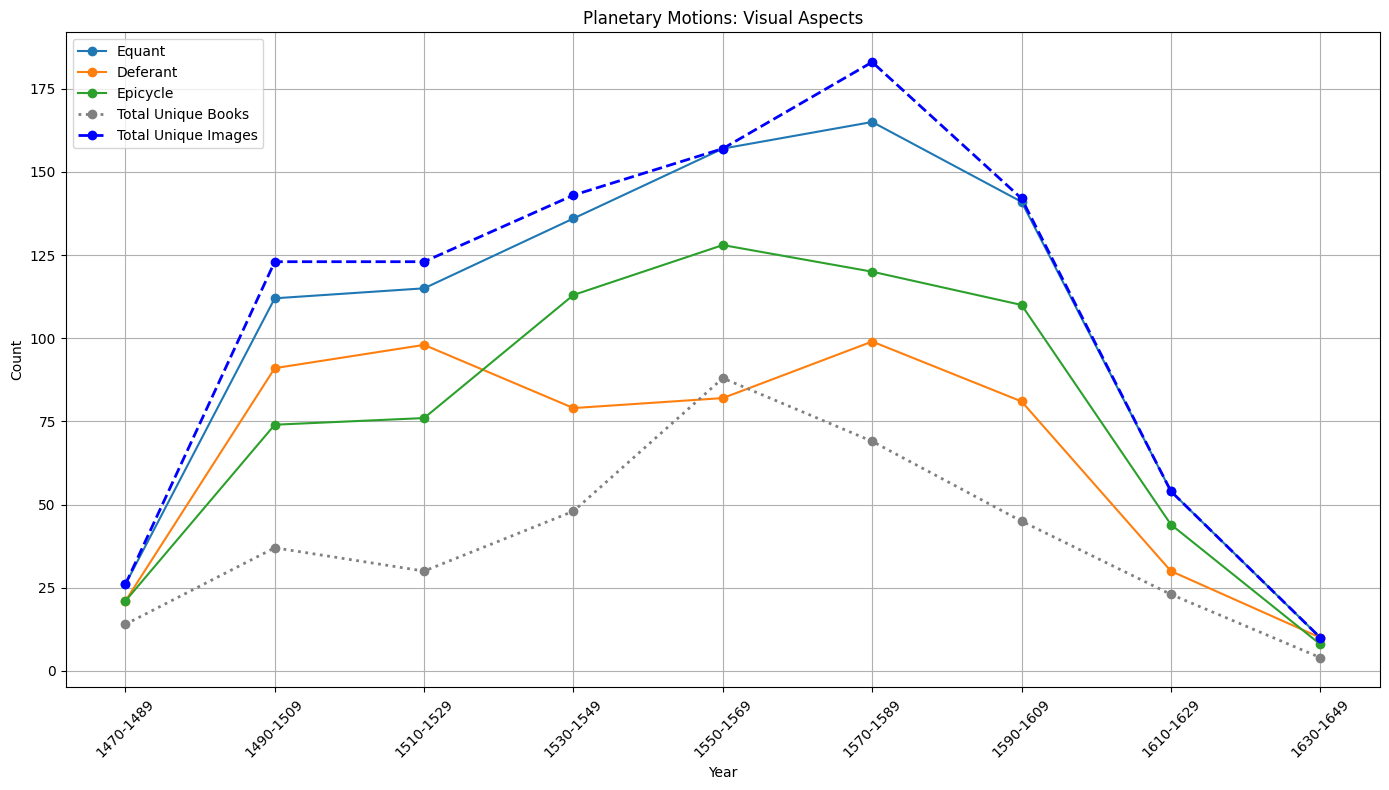

In [43]:
# Convert 'year' to int
planetary_motion_visual['year'] = planetary_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
planetary_motion_visual['interval'] = pd.cut(planetary_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = planetary_motion_visual[planetary_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
equant = count_unique_images_by_column('equant', 'yes')
deferant = count_unique_images_by_column('deferant', 'yes')
epicycle = count_unique_images_by_column('epicycle', 'yes')
geometrical_lines_of_sight = count_unique_images_by_column('geometrical lines of sight', 'yes')
color = count_unique_images_by_column('color', 'yes')
moon_symbol_or_dragon_points = count_unique_images_by_column('moon symbol or dragon points', 'yes')
multiple_positions_on_epicycle_or_equant_deferent = count_unique_images_by_column('multiple positions on the epicycle or equant/ deferent', 'yes')
multiple_epicycles = count_unique_images_by_column('multiple epicycles', 'yes')
sign_symbol = count_unique_images_by_column('sign symbol', 'yes')
diagram_lines = count_unique_images_by_column('diagram lines', 'yes')
decoration_or_face = count_unique_images_by_column('decoration or face', 'yes')
three_dimensionality_effect = count_unique_images_by_column('three-dimensionality effect', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')

# Combine the data for lines with updated columns
side_by_side_data = pd.DataFrame({
    'Equant': equant,
    'Deferant': deferant,
    'Epicycle': epicycle,
#    'Geometrical Lines of Sight': geometrical_lines_of_sight,
#    'Color': color,
#    'Moon Symbol or Dragon Points': moon_symbol_or_dragon_points,
#    'Multiple Positions on Epicycle or Equant/Deferent': multiple_positions_on_epicycle_or_equant_deferent,
#    'Multiple Epicycles': multiple_epicycles,
#    'Sign Symbol': sign_symbol,
#    'Diagram Lines': diagram_lines,
#    'Decoration or Face': decoration_or_face,
#    'Three-Dimensionality Effect': three_dimensionality_effect,
#    'Material Object': material_object,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = planetary_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Planetary Motions: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


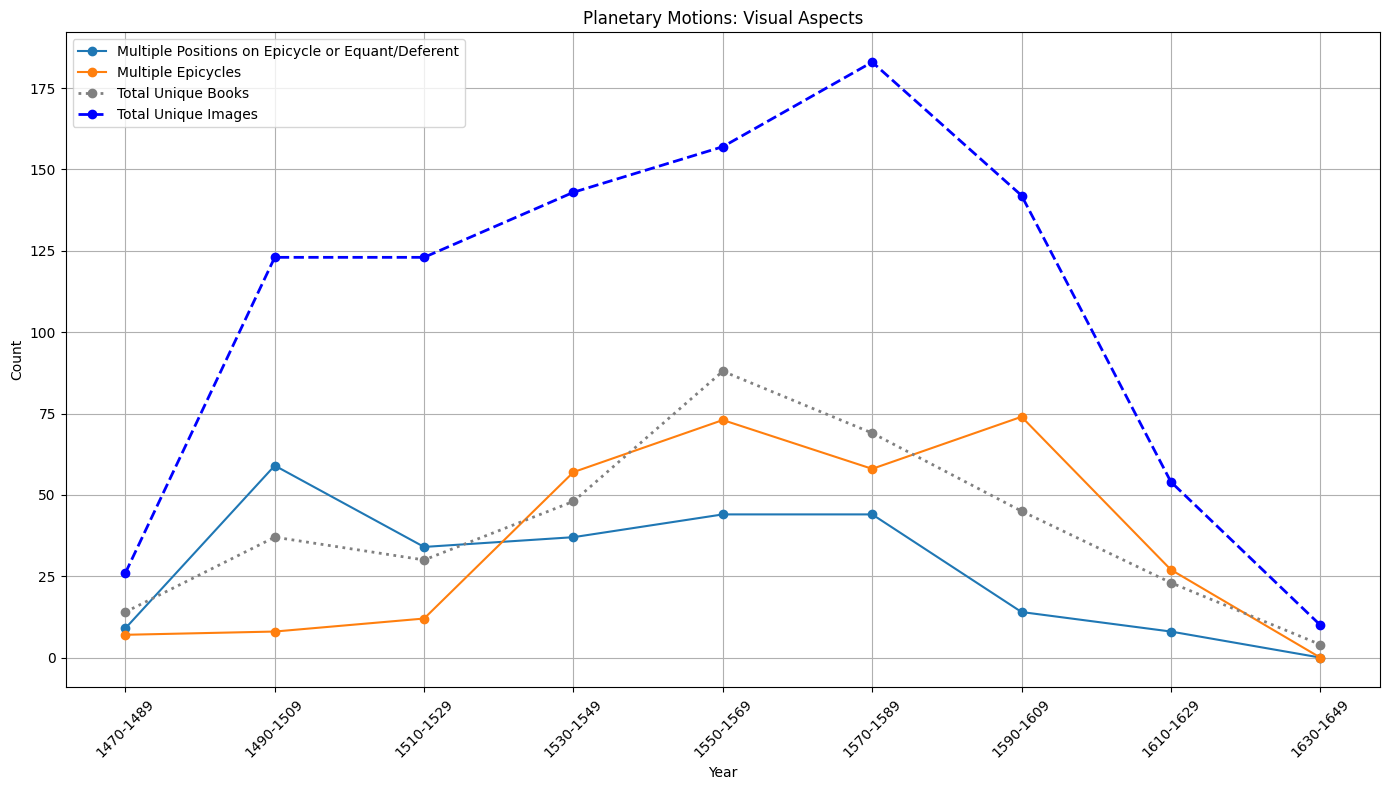

In [47]:
# Convert 'year' to int
planetary_motion_visual['year'] = planetary_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
planetary_motion_visual['interval'] = pd.cut(planetary_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = planetary_motion_visual[planetary_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
equant = count_unique_images_by_column('equant', 'yes')
deferant = count_unique_images_by_column('deferant', 'yes')
epicycle = count_unique_images_by_column('epicycle', 'yes')
geometrical_lines_of_sight = count_unique_images_by_column('geometrical lines of sight', 'yes')
color = count_unique_images_by_column('color', 'yes')
moon_symbol_or_dragon_points = count_unique_images_by_column('moon symbol or dragon points', 'yes')
multiple_positions_on_epicycle_or_equant_deferent = count_unique_images_by_column('multiple positions on the epicycle or equant/ deferent', 'yes')
multiple_epicycles = count_unique_images_by_column('multiple epicycles', 'yes')
sign_symbol = count_unique_images_by_column('sign symbol', 'yes')
diagram_lines = count_unique_images_by_column('diagram lines', 'yes')
decoration_or_face = count_unique_images_by_column('decoration or face', 'yes')
three_dimensionality_effect = count_unique_images_by_column('three-dimensionality effect', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')

# Combine the data for lines with updated columns
side_by_side_data = pd.DataFrame({
 #   'Equant': equant,
 #   'Deferant': deferant,
 #   'Epicycle': epicycle,
 #   'Geometrical Lines of Sight': geometrical_lines_of_sight,
 #   'Color': color,
  #  'Moon Symbol or Dragon Points': moon_symbol_or_dragon_points,
    'Multiple Positions on Epicycle or Equant/Deferent': multiple_positions_on_epicycle_or_equant_deferent,
    'Multiple Epicycles': multiple_epicycles,
  #  'Sign Symbol': sign_symbol,
  #  'Diagram Lines': diagram_lines,
  #  'Decoration or Face': decoration_or_face,
  #  'Three-Dimensionality Effect': three_dimensionality_effect,
  #  'Material Object': material_object,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = planetary_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Planetary Motions: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



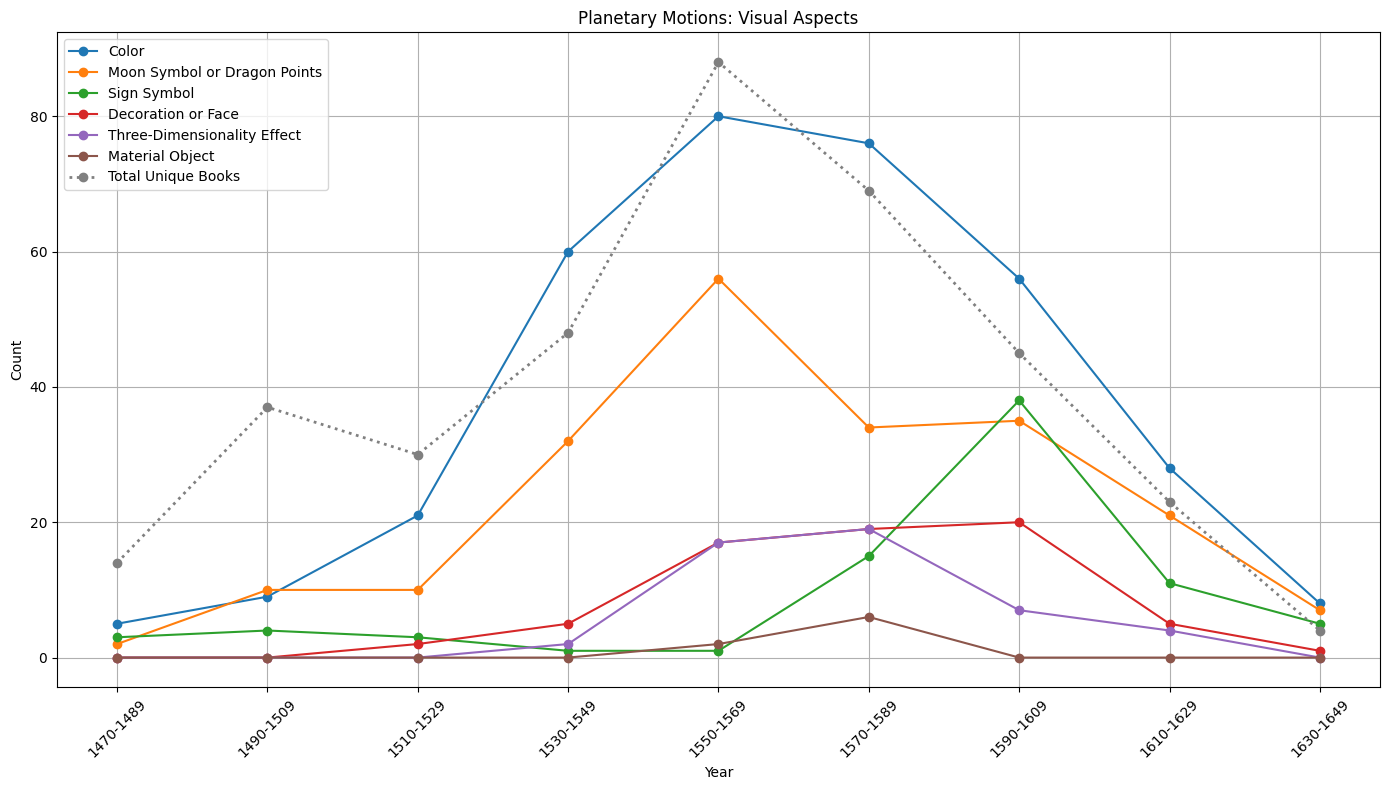

In [45]:
# Convert 'year' to int
planetary_motion_visual['year'] = planetary_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
planetary_motion_visual['interval'] = pd.cut(planetary_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = planetary_motion_visual[planetary_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
equant = count_unique_images_by_column('equant', 'yes')
deferant = count_unique_images_by_column('deferant', 'yes')
epicycle = count_unique_images_by_column('epicycle', 'yes')
geometrical_lines_of_sight = count_unique_images_by_column('geometrical lines of sight', 'yes')
color = count_unique_images_by_column('color', 'yes')
moon_symbol_or_dragon_points = count_unique_images_by_column('moon symbol or dragon points', 'yes')
multiple_positions_on_epicycle_or_equant_deferent = count_unique_images_by_column('multiple positions on the epicycle or equant/ deferent', 'yes')
multiple_epicycles = count_unique_images_by_column('multiple epicycles', 'yes')
sign_symbol = count_unique_images_by_column('sign symbol', 'yes')
diagram_lines = count_unique_images_by_column('diagram lines', 'yes')
decoration_or_face = count_unique_images_by_column('decoration or face', 'yes')
three_dimensionality_effect = count_unique_images_by_column('three-dimensionality effect', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')

# Combine the data for lines with updated columns
side_by_side_data = pd.DataFrame({
 #   'Equant': equant,
 #   'Deferant': deferant,
 #   'Epicycle': epicycle,
 #   'Geometrical Lines of Sight': geometrical_lines_of_sight,
    'Color': color,
    'Moon Symbol or Dragon Points': moon_symbol_or_dragon_points,
#    'Multiple Positions on Epicycle or Equant/Deferent': multiple_positions_on_epicycle_or_equant_deferent,
#    'Multiple Epicycles': multiple_epicycles,
    'Sign Symbol': sign_symbol,
 #   'Diagram Lines': diagram_lines,
    'Decoration or Face': decoration_or_face,
    'Three-Dimensionality Effect': three_dimensionality_effect,
    'Material Object': material_object,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = planetary_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
#ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Planetary Motions: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



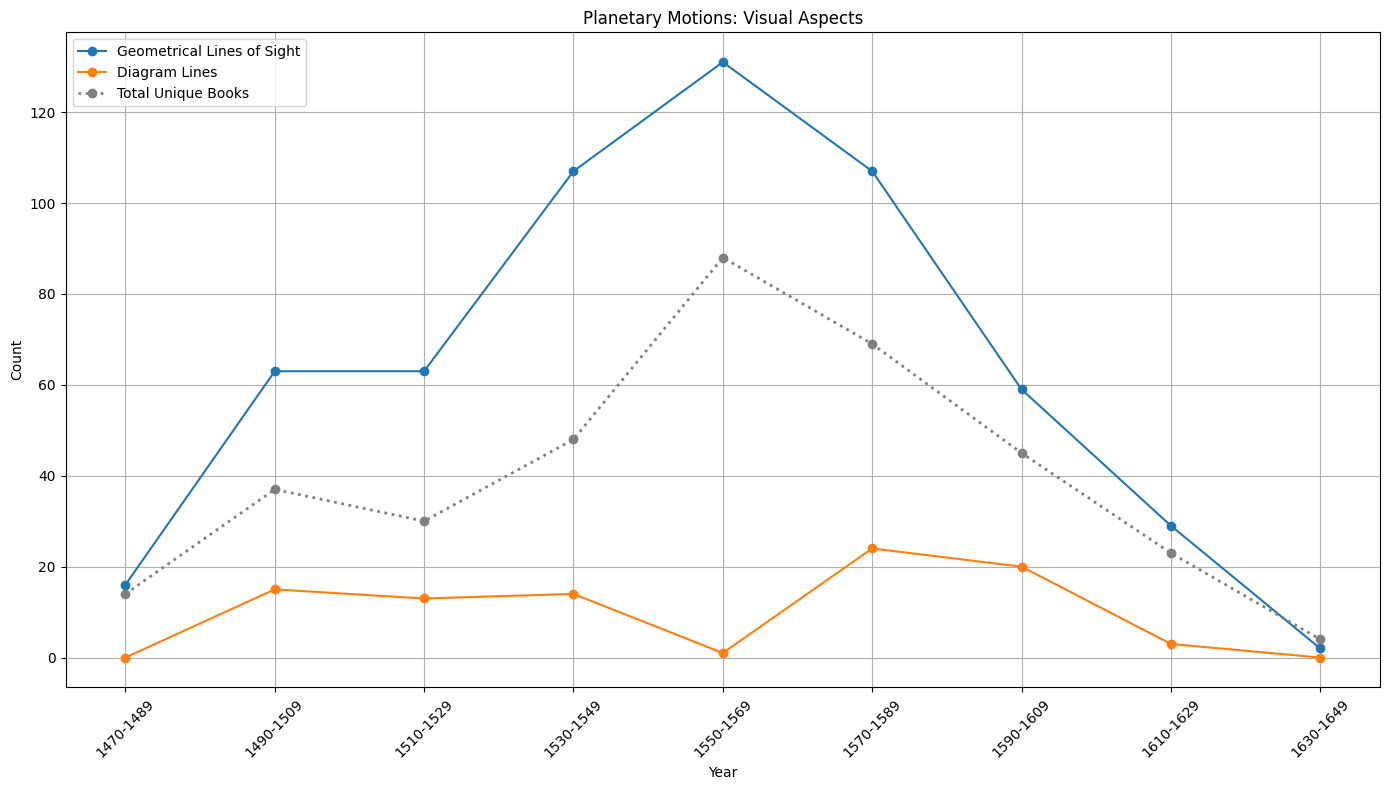

In [46]:
# Convert 'year' to int
planetary_motion_visual['year'] = planetary_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
planetary_motion_visual['interval'] = pd.cut(planetary_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = planetary_motion_visual[planetary_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
equant = count_unique_images_by_column('equant', 'yes')
deferant = count_unique_images_by_column('deferant', 'yes')
epicycle = count_unique_images_by_column('epicycle', 'yes')
geometrical_lines_of_sight = count_unique_images_by_column('geometrical lines of sight', 'yes')
color = count_unique_images_by_column('color', 'yes')
moon_symbol_or_dragon_points = count_unique_images_by_column('moon symbol or dragon points', 'yes')
multiple_positions_on_epicycle_or_equant_deferent = count_unique_images_by_column('multiple positions on the epicycle or equant/ deferent', 'yes')
multiple_epicycles = count_unique_images_by_column('multiple epicycles', 'yes')
sign_symbol = count_unique_images_by_column('sign symbol', 'yes')
diagram_lines = count_unique_images_by_column('diagram lines', 'yes')
decoration_or_face = count_unique_images_by_column('decoration or face', 'yes')
three_dimensionality_effect = count_unique_images_by_column('three-dimensionality effect', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')

# Combine the data for lines with updated columns
side_by_side_data = pd.DataFrame({
 #   'Equant': equant,
 #   'Deferant': deferant,
 #   'Epicycle': epicycle,
    'Geometrical Lines of Sight': geometrical_lines_of_sight,
#    'Color': color,
 #   'Moon Symbol or Dragon Points': moon_symbol_or_dragon_points,
  #  'Multiple Positions on Epicycle or Equant/Deferent': multiple_positions_on_epicycle_or_equant_deferent,
  #  'Multiple Epicycles': multiple_epicycles,
  #  'Sign Symbol': sign_symbol,
    'Diagram Lines': diagram_lines,
 #   'Decoration or Face': decoration_or_face,
 #   'Three-Dimensionality Effect': three_dimensionality_effect,
  #  'Material Object': material_object,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = planetary_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
#ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Planetary Motions: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

